In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
refund_data = pd.read_csv('../data/cleaned_refund_data.csv')
tickets_data = pd.read_csv('../data/cleaned_tickets_data.csv')
quizzes_data = pd.read_csv('../data/quizzes_cleaned.csv')
customers_data = pd.read_csv('../data/customers_cleaned.csv')
marketing_data = pd.read_csv('../data/marketing_cleaned.csv')
orders_data = pd.read_csv('../data/orders_redacted_cleaned.csv')
orders_utm_data = pd.read_csv('../data/orders_with_utm_cleaned.csv')

In [3]:
print("\nRefund Data Info:")
refund_data.info()

print("\nTickets Data Info:")
tickets_data.info()

print("\nquizzes Data Info:")
quizzes_data.info()

print("\ncustomers Data  Info:")
customers_data.info()

print("\nmarketing data info:")
marketing_data.info()

print("\norders data info:")
orders_data.info()

print("\norders_utm data info:")
orders_utm_data.info() 


Refund Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13209 entries, 0 to 13208
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   refund_id               13209 non-null  int64  
 1   order_id                13209 non-null  int64  
 2   refund_date             13209 non-null  object 
 3   refund_amount           13209 non-null  float64
 4   refund_reason           9564 non-null   object 
 5   refund_reason_dropdown  1412 non-null   object 
 6   site                    13209 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 722.5+ KB

Tickets Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      14712 non-null  int64  
 1   created_at              14712 non-null 

In [4]:
# Show me the column names and sample data
print("Refund Data Columns:", refund_data.columns.tolist())
print("Sample refund data:")
print(refund_data.head())

print("\nTickets Data Columns:", tickets_data.columns.tolist()) 
print("Sample tickets data:")
print(tickets_data.head())

Refund Data Columns: ['refund_id', 'order_id', 'refund_date', 'refund_amount', 'refund_reason', 'refund_reason_dropdown', 'site']
Sample refund data:
   refund_id  order_id                refund_date  refund_amount  \
0    1192634   1186912  2025-03-03 09:00:05+00:00           5.95   
1    1167915   1164000  2025-01-31 11:07:23+00:00          13.73   
2    1154797   1153090  2025-01-15 11:16:02+00:00          30.00   
3    1150931   1144815  2025-01-10 12:32:00+00:00          13.86   
4    1150907   1146543  2025-01-10 11:13:44+00:00          12.95   

     refund_reason refund_reason_dropdown                 site  
0  shipping charge    Shipping - refunded  ellevetsciences.com  
1  shipping charge    Shipping - refunded  ellevetsciences.com  
2  shipping charge    Shipping - refunded  ellevetsciences.com  
3  shipping charge    Shipping - refunded  ellevetsciences.com  
4  shipping charge    Shipping - refunded  ellevetsciences.com  

Tickets Data Columns: ['id', 'created_at', 'update

In [5]:
# Just show me a sample of your actual refund data
print("Refund reasons sample:")
print(refund_data['refund_reason'].value_counts().head(10))
print("\nRefund amounts sample:")
print(refund_data['refund_amount'].describe())

Refund reasons sample:
refund_reason
order fully refunded.                     750
customer requests                         458
customer request                          410
returning unopened product                367
cancelled order                           321
Cancelled prior to shipment - refunded    252
Illness / Deceased - refunded             251
duplicate order                           222
customer requested                        216
returning unopened                        193
Name: count, dtype: int64

Refund amounts sample:
count    13209.000000
mean       100.086898
std         78.817739
min          0.020000
25%         65.740000
50%         87.320000
75%        122.500000
max       2357.590000
Name: refund_amount, dtype: float64


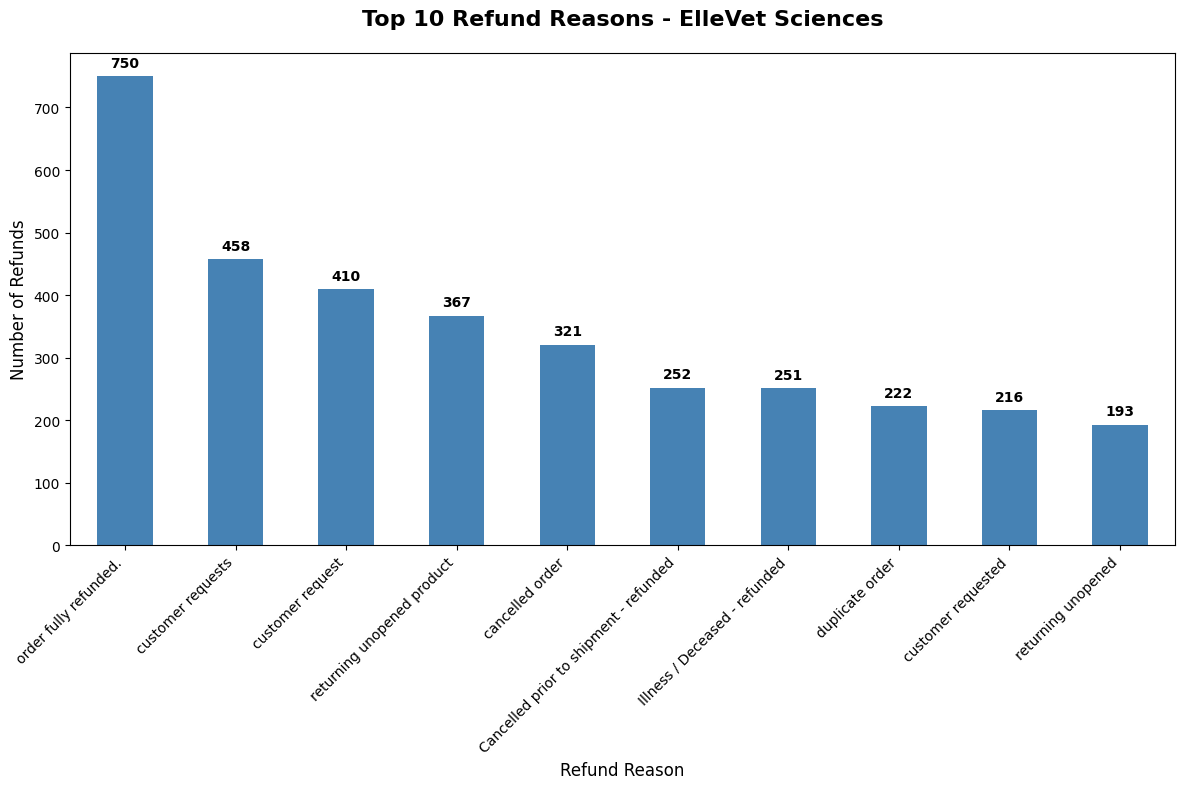


Key Insights:
Total refunds analyzed: 13,209
Top 3 reasons account for: 1,618 refunds (12.2%)
Average refund amount: $100.09

Top 10 Refund Reasons:
order fully refunded.: 750 (5.7%)
customer requests: 458 (3.5%)
customer request: 410 (3.1%)
returning unopened product: 367 (2.8%)
cancelled order: 321 (2.4%)
Cancelled prior to shipment - refunded: 252 (1.9%)
Illness / Deceased - refunded: 251 (1.9%)
duplicate order: 222 (1.7%)
customer requested: 216 (1.6%)
returning unopened: 193 (1.5%)


In [6]:
# Analyze refund reasons
refund_reasons_count = refund_data['refund_reason'].value_counts().head(10)

# Create the visualization
plt.figure(figsize=(12, 8))
ax = refund_reasons_count.plot(kind='bar', color='steelblue')

# Customize the plot
plt.title('Top 10 Refund Reasons - ElleVet Sciences', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Refund Reason', fontsize=12)
plt.ylabel('Number of Refunds', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for i, v in enumerate(refund_reasons_count.values):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print key insights
total_refunds = len(refund_data)
top_3_total = refund_reasons_count.head(3).sum()
print(f"\nKey Insights:")
print(f"Total refunds analyzed: {total_refunds:,}")
print(f"Top 3 reasons account for: {top_3_total:,} refunds ({top_3_total/total_refunds*100:.1f}%)")
print(f"Average refund amount: ${refund_data['refund_amount'].mean():.2f}")

# Show the actual data
print(f"\nTop 10 Refund Reasons:")
for reason, count in refund_reasons_count.items():
    percentage = (count/total_refunds) * 100
    print(f"{reason}: {count} ({percentage:.1f}%)")

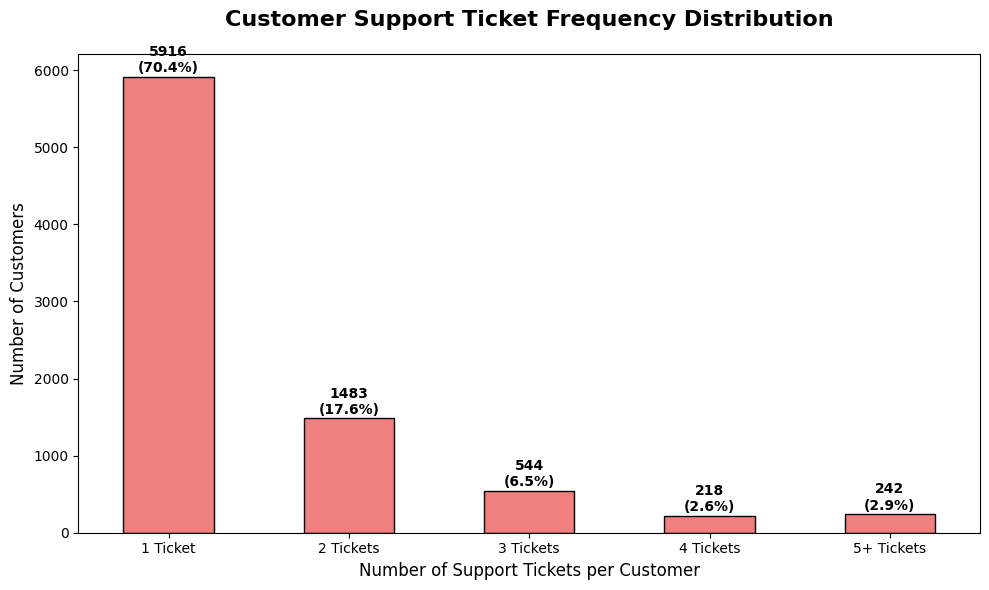


Key Insights:
Total unique customers: 8,403
Single ticket customers: 5,916 (70.4%)
Repeat customers (2+ tickets): 2,487 (29.6%)
High-frequency customers (5+ tickets): 242 (2.9%)

Detailed Breakdown:
1 Ticket: 5,916 customers (70.4%)
2 Tickets: 1,483 customers (17.6%)
3 Tickets: 544 customers (6.5%)
4 Tickets: 218 customers (2.6%)
5+ Tickets: 242 customers (2.9%)

Top 10 Customers by Ticket Count:
Customer ID 30092252123667: 850 tickets
Customer ID 30245737627411: 659 tickets
Customer ID 30084804330515: 107 tickets
Customer ID 27778647157267: 63 tickets
Customer ID 30084926911123: 50 tickets
Customer ID 30420424259219: 28 tickets
Customer ID 30297501881875: 26 tickets
Customer ID 33343010313619: 26 tickets
Customer ID 36081956430355: 25 tickets
Customer ID 37970940572563: 25 tickets


In [7]:
# Analyze ticket frequency per customer
# Count tickets per customer using requester_id (or requester_email if preferred)
customer_ticket_counts = tickets_data['requester_id'].value_counts()

# Create frequency distribution - how many customers have 1, 2, 3+ tickets
ticket_frequency_dist = customer_ticket_counts.value_counts().sort_index()

# Create categories for better visualization
def categorize_tickets(count):
    if count == 1
        return '1 Ticket'
    elif count == 2:
        return '2 Tickets'
    elif count == 3:
        return '3 Tickets'
    elif count == 4:
        return '4 Tickets'
    else:
        return '5+ Tickets'

# Apply categorization
ticket_categories = customer_ticket_counts.apply(categorize_tickets).value_counts()

# Reorder for logical display
category_order = ['1 Ticket', '2 Tickets', '3 Tickets', '4 Tickets', '5+ Tickets']
ticket_categories = ticket_categories.reindex(category_order, fill_value=0)

# Create the visualization
plt.figure(figsize=(10, 6))
ax = ticket_categories.plot(kind='bar', color='lightcoral', edgecolor='black')

# Customize the plot
plt.title('Customer Support Ticket Frequency Distribution', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Support Tickets per Customer', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(ticket_categories.values):
    percentage = (v / ticket_categories.sum()) * 100
    ax.text(i, v + 20, f'{v}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate key metrics
total_customers = len(customer_ticket_counts)
single_ticket_customers = ticket_categories.get('1 Ticket', 0)
repeat_customers = total_customers - single_ticket_customers
high_frequency_customers = ticket_categories.get('5+ Tickets', 0)

print(f"\nKey Insights:")
print(f"Total unique customers: {total_customers:,}")
print(f"Single ticket customers: {single_ticket_customers:,} ({single_ticket_customers/total_customers*100:.1f}%)")
print(f"Repeat customers (2+ tickets): {repeat_customers:,} ({repeat_customers/total_customers*100:.1f}%)")
print(f"High-frequency customers (5+ tickets): {high_frequency_customers:,} ({high_frequency_customers/total_customers*100:.1f}%)")

print(f"\nDetailed Breakdown:")
for category, count in ticket_categories.items():
    percentage = (count / total_customers) * 100
    print(f"{category}: {count:,} customers ({percentage:.1f}%)")

# Show customers with most tickets (top 10)
print(f"\nTop 10 Customers by Ticket Count:")
top_customers = customer_ticket_counts.head(10)
for customer_id, ticket_count in top_customers.items():
    print(f"Customer ID {customer_id}: {ticket_count} tickets")

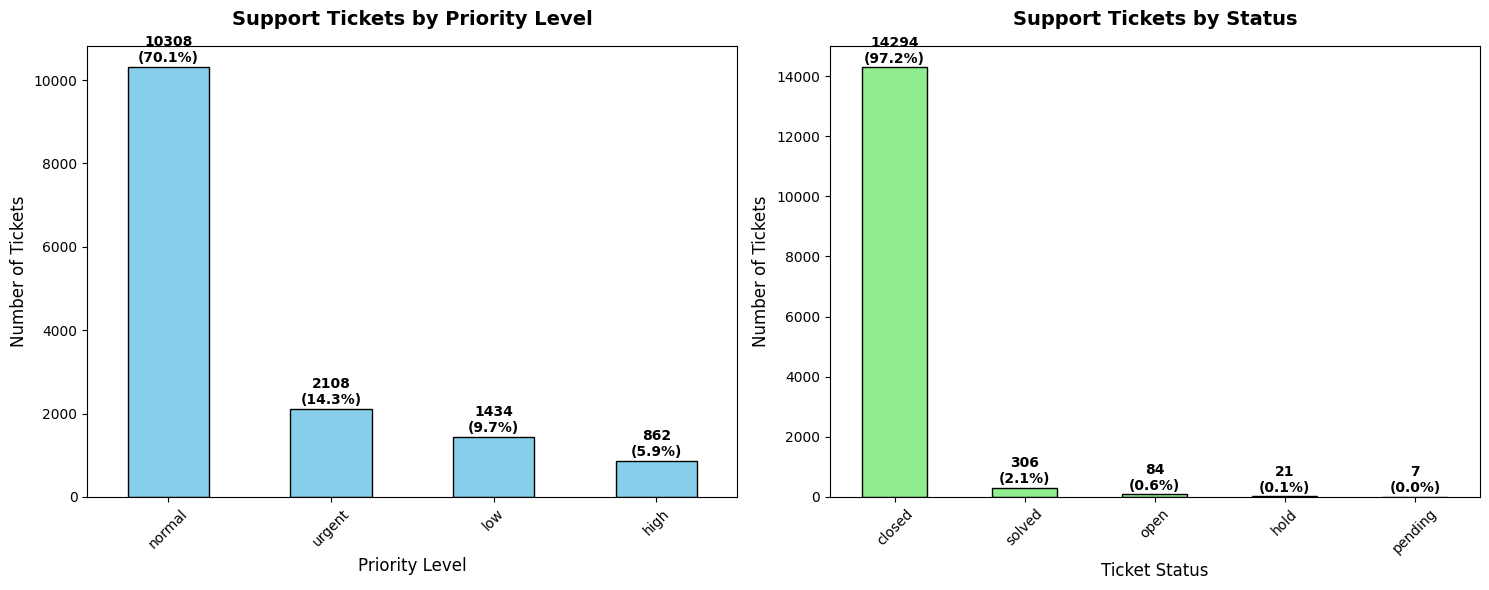

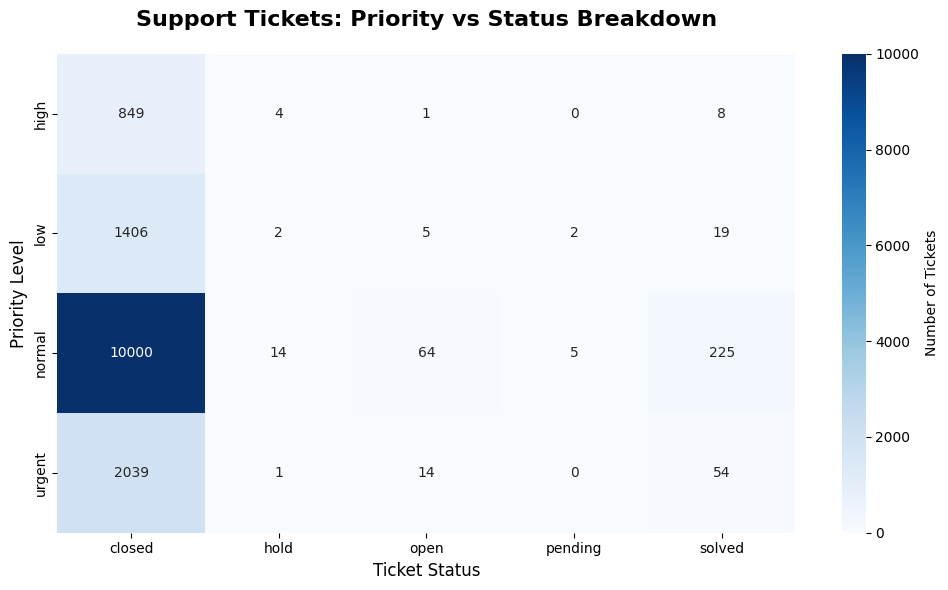


Key Insights:
Total support tickets: 14,712
High/Urgent priority tickets: 2,970 (20.2%)
Open/Active tickets: 112 (0.8%)
Closed tickets: 14,294 (97.2%)

Priority Level Breakdown:
Normal: 10,308 tickets (70.1%)
Urgent: 2,108 tickets (14.3%)
Low: 1,434 tickets (9.7%)
High: 862 tickets (5.9%)

Status Breakdown:
Closed: 14,294 tickets (97.2%)
Solved: 306 tickets (2.1%)
Open: 84 tickets (0.6%)
Hold: 21 tickets (0.1%)
Pending: 7 tickets (0.0%)

Operational Insights:
Tickets on hold: 21 - May indicate resource bottlenecks
Pending tickets: 7 - May need customer follow-up

Priority vs Status Cross-tabulation:
status    closed  hold  open  pending  solved
priority                                     
high         849     4     1        0       8
low         1406     2     5        2      19
normal     10000    14    64        5     225
urgent      2039     1    14        0      54


In [8]:
# Analyze ticket priority distribution
priority_counts = tickets_data['priority'].value_counts()

# Analyze ticket status distribution
status_counts = tickets_data['status'].value_counts()

# Create subplot for both analyses
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Ticket Priority Distribution
priority_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Support Tickets by Priority Level', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Priority Level', fontsize=12)
ax1.set_ylabel('Number of Tickets', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on priority bars
for i, v in enumerate(priority_counts.values):
    percentage = (v / len(tickets_data)) * 100
    ax1.text(i, v + 50, f'{v}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

# Plot 2: Ticket Status Distribution
status_counts.plot(kind='bar', ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Support Tickets by Status', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Ticket Status', fontsize=12)
ax2.set_ylabel('Number of Tickets', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Add value labels on status bars
for i, v in enumerate(status_counts.values):
    percentage = (v / len(tickets_data)) * 100
    ax2.text(i, v + 50, f'{v}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Analyze priority vs status cross-tabulation
priority_status_crosstab = pd.crosstab(tickets_data['priority'], tickets_data['status'])

# Create heatmap for priority vs status
plt.figure(figsize=(10, 6))
sns.heatmap(priority_status_crosstab, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Tickets'})
plt.title('Support Tickets: Priority vs Status Breakdown', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ticket Status', fontsize=12)
plt.ylabel('Priority Level', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate key insights
total_tickets = len(tickets_data)
high_priority = tickets_data[tickets_data['priority'].isin(['high', 'urgent'])].shape[0]
open_tickets = tickets_data[tickets_data['status'].isin(['new', 'open', 'pending', 'hold'])].shape[0]
closed_tickets = tickets_data[tickets_data['status'] == 'closed'].shape[0]

print(f"\nKey Insights:")
print(f"Total support tickets: {total_tickets:,}")
print(f"High/Urgent priority tickets: {high_priority:,} ({high_priority/total_tickets*100:.1f}%)")
print(f"Open/Active tickets: {open_tickets:,} ({open_tickets/total_tickets*100:.1f}%)")
print(f"Closed tickets: {closed_tickets:,} ({closed_tickets/total_tickets*100:.1f}%)")

print(f"\nPriority Level Breakdown:")
for priority, count in priority_counts.items():
    percentage = (count / total_tickets) * 100
    print(f"{priority.capitalize()}: {count:,} tickets ({percentage:.1f}%)")

print(f"\nStatus Breakdown:")
for status, count in status_counts.items():
    percentage = (count / total_tickets) * 100
    print(f"{status.capitalize()}: {count:,} tickets ({percentage:.1f}%)")

# Identify potential operational issues
print(f"\nOperational Insights:")
if 'hold' in status_counts:
    hold_tickets = status_counts.get('hold', 0)
    print(f"Tickets on hold: {hold_tickets:,} - May indicate resource bottlenecks")

if 'pending' in status_counts:
    pending_tickets = status_counts.get('pending', 0)
    print(f"Pending tickets: {pending_tickets:,} - May need customer follow-up")

# Show the cross-tabulation
print(f"\nPriority vs Status Cross-tabulation:")
print(priority_status_crosstab)

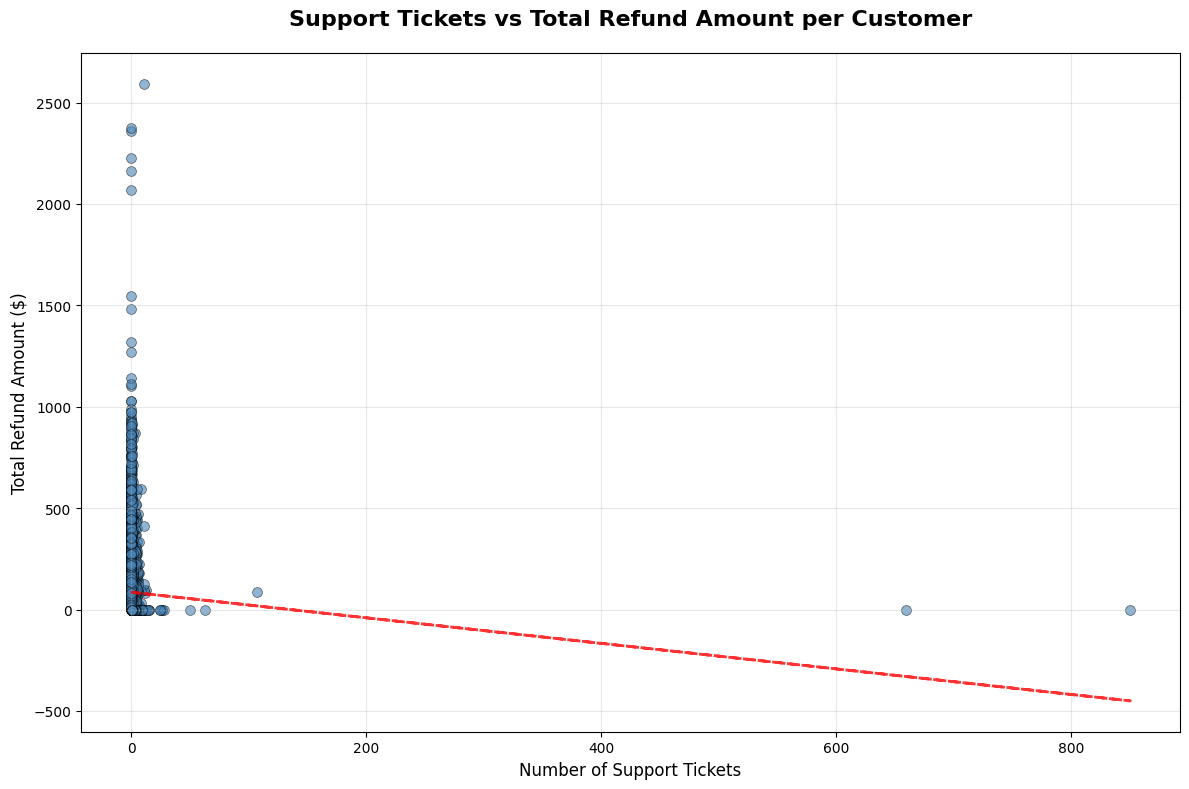

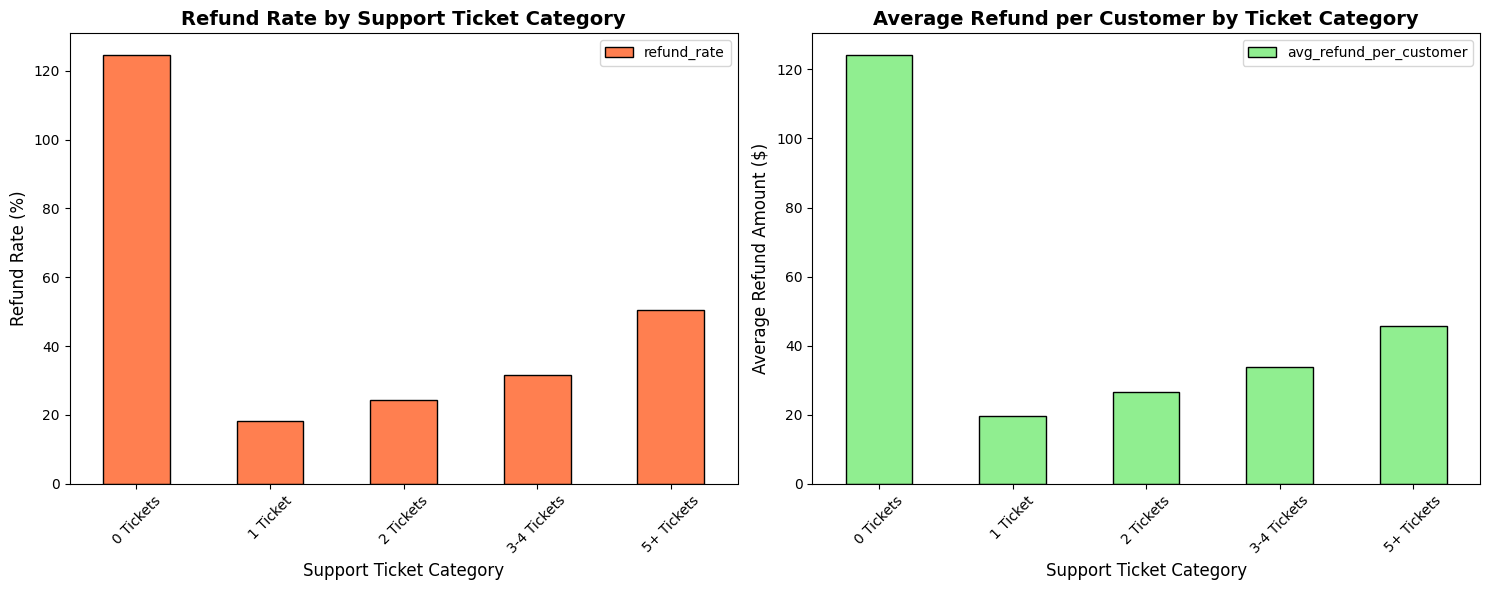


Support to Refund Correlation Analysis:
Correlation coefficient: -0.046
Total customers analyzed: 17,492

Breakdown by Ticket Category:
0 Tickets: 10,637 customers, 124.7% refund rate, $124.24 avg refund
1 Ticket: 4,631 customers, 18.3% refund rate, $19.55 avg refund
2 Tickets: 1,293 customers, 24.2% refund rate, $26.71 avg refund
3-4 Tickets: 697 customers, 31.7% refund rate, $33.87 avg refund
5+ Tickets: 234 customers, 50.4% refund rate, $45.68 avg refund

High-risk customers (3+ tickets + refunds): 206
Total refund amount from high-risk customers: $34,298.34


In [9]:
# Step 1: Connect tickets to customers via email/customer_id
# First, let's get customer info from orders to link tickets and refunds
customer_mapping = orders_data[['order_id', 'customer_id', 'email_hash']].drop_duplicates()

# Step 2: Link refunds to customer_id via order_id
refunds_with_customer = refund_data.merge(customer_mapping, on='order_id', how='left')

# Step 3: Get ticket counts per customer (using email_hash if available, or requester_email)
# Count tickets per customer using requester_email (hashed)
ticket_counts_per_customer = tickets_data.groupby('requester_email').size().reset_index()
ticket_counts_per_customer.columns = ['email_hash', 'ticket_count']

# Step 4: Get refund info per customer
refund_summary_per_customer = refunds_with_customer.groupby('email_hash').agg({
    'refund_amount': ['count', 'sum', 'mean']
}).reset_index()
refund_summary_per_customer.columns = ['email_hash', 'refund_count', 'total_refund_amount', 'avg_refund_amount']

# Step 5: Merge tickets and refunds data
correlation_data = ticket_counts_per_customer.merge(
    refund_summary_per_customer, 
    on='email_hash', 
    how='outer'
).fillna(0)

# Step 6: Create correlation analysis
# Remove customers with 0 tickets and 0 refunds for cleaner analysis
analysis_data = correlation_data[(correlation_data['ticket_count'] > 0) | (correlation_data['refund_count'] > 0)]

# Create scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(analysis_data['ticket_count'], analysis_data['total_refund_amount'], 
           alpha=0.6, s=50, c='steelblue', edgecolors='black', linewidth=0.5)

plt.title('Support Tickets vs Total Refund Amount per Customer', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Support Tickets', fontsize=12)
plt.ylabel('Total Refund Amount ($)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(analysis_data['ticket_count'], analysis_data['total_refund_amount'], 1)
p = np.poly1d(z)
plt.plot(analysis_data['ticket_count'], p(analysis_data['ticket_count']), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Create categorical analysis for better insights
def categorize_ticket_count(count):
    if count == 0:
        return '0 Tickets'
    elif count == 1:
        return '1 Ticket'
    elif count == 2:
        return '2 Tickets'
    elif count in [3, 4]:
        return '3-4 Tickets'
    else:
        return '5+ Tickets'

correlation_data['ticket_category'] = correlation_data['ticket_count'].apply(categorize_ticket_count)

# Calculate refund rates by ticket category
category_analysis = correlation_data.groupby('ticket_category').agg({
    'email_hash': 'count',
    'refund_count': 'sum',
    'total_refund_amount': 'sum'
}).reset_index()

category_analysis.columns = ['ticket_category', 'customer_count', 'total_refunds', 'total_refund_amount']
category_analysis['refund_rate'] = (category_analysis['total_refunds'] / category_analysis['customer_count']) * 100
category_analysis['avg_refund_per_customer'] = category_analysis['total_refund_amount'] / category_analysis['customer_count']

# Visualize the categorical analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Refund Rate by Ticket Category
category_analysis.plot(x='ticket_category', y='refund_rate', kind='bar', ax=ax1, color='coral', edgecolor='black')
ax1.set_title('Refund Rate by Support Ticket Category', fontsize=14, fontweight='bold')
ax1.set_xlabel('Support Ticket Category', fontsize=12)
ax1.set_ylabel('Refund Rate (%)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Average Refund Amount by Ticket Category
category_analysis.plot(x='ticket_category', y='avg_refund_per_customer', kind='bar', ax=ax2, color='lightgreen', edgecolor='black')
ax2.set_title('Average Refund per Customer by Ticket Category', fontsize=14, fontweight='bold')
ax2.set_xlabel('Support Ticket Category', fontsize=12)
ax2.set_ylabel('Average Refund Amount ($)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation coefficient
import numpy as np
correlation_coef = np.corrcoef(analysis_data['ticket_count'], analysis_data['total_refund_amount'])[0, 1]

# Print key insights
print(f"\nSupport to Refund Correlation Analysis:")
print(f"Correlation coefficient: {correlation_coef:.3f}")
print(f"Total customers analyzed: {len(analysis_data):,}")

print(f"\nBreakdown by Ticket Category:")
for _, row in category_analysis.iterrows():
    print(f"{row['ticket_category']}: {row['customer_count']:,} customers, "
          f"{row['refund_rate']:.1f}% refund rate, "
          f"${row['avg_refund_per_customer']:.2f} avg refund")

# Identify high-risk customers (3+ tickets + refunds)
high_risk_customers = analysis_data[(analysis_data['ticket_count'] >= 3) & (analysis_data['refund_count'] > 0)]
print(f"\nHigh-risk customers (3+ tickets + refunds): {len(high_risk_customers):,}")
print(f"Total refund amount from high-risk customers: ${high_risk_customers['total_refund_amount'].sum():,.2f}")

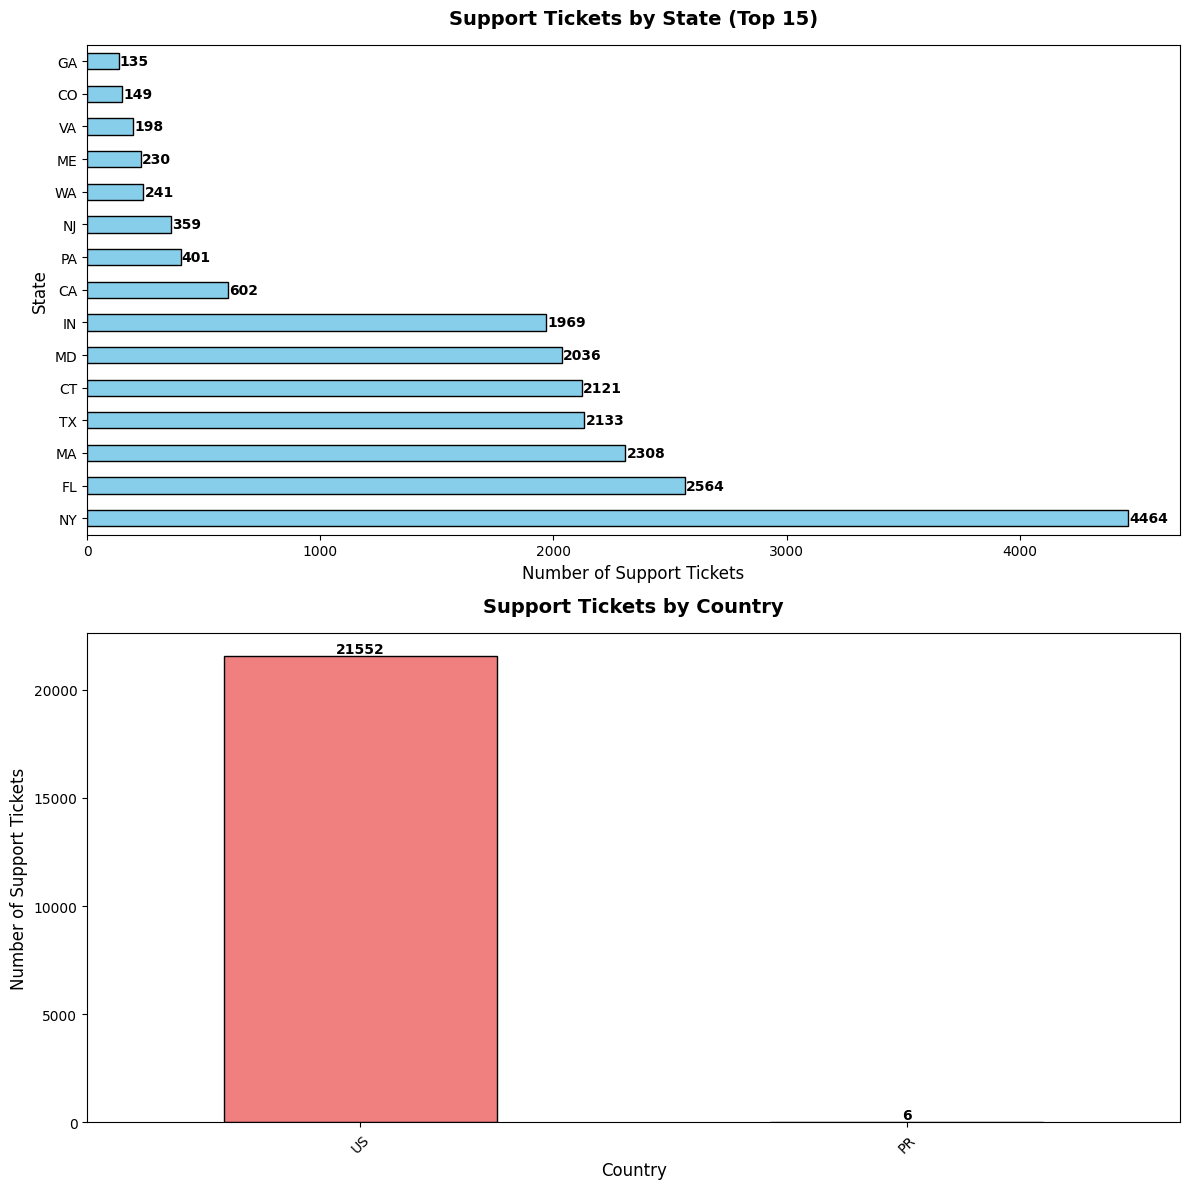

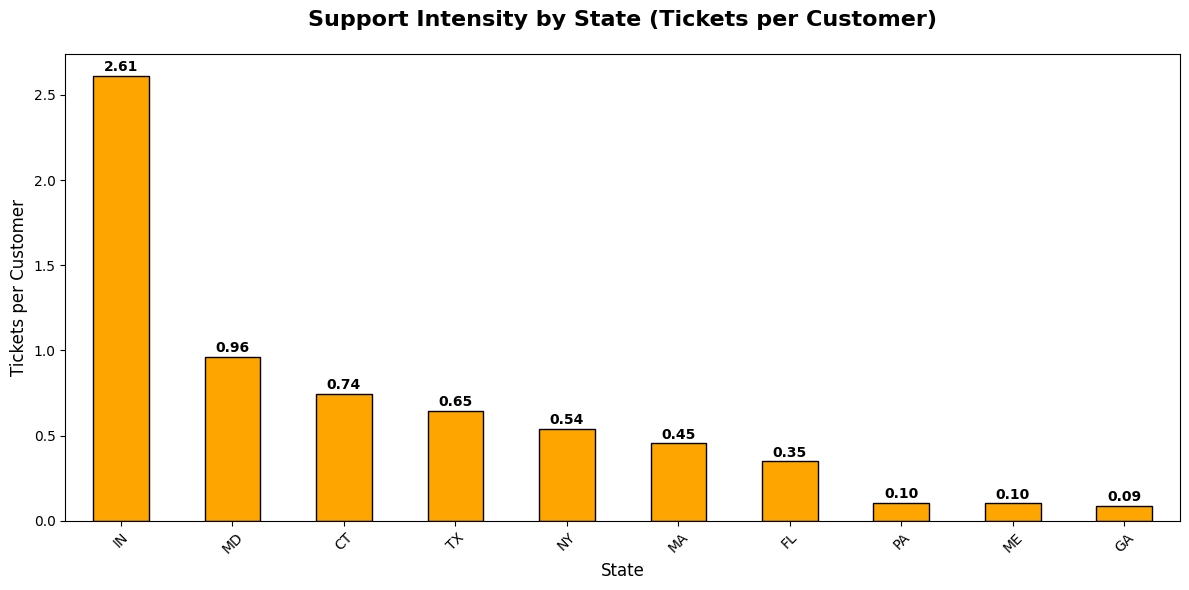

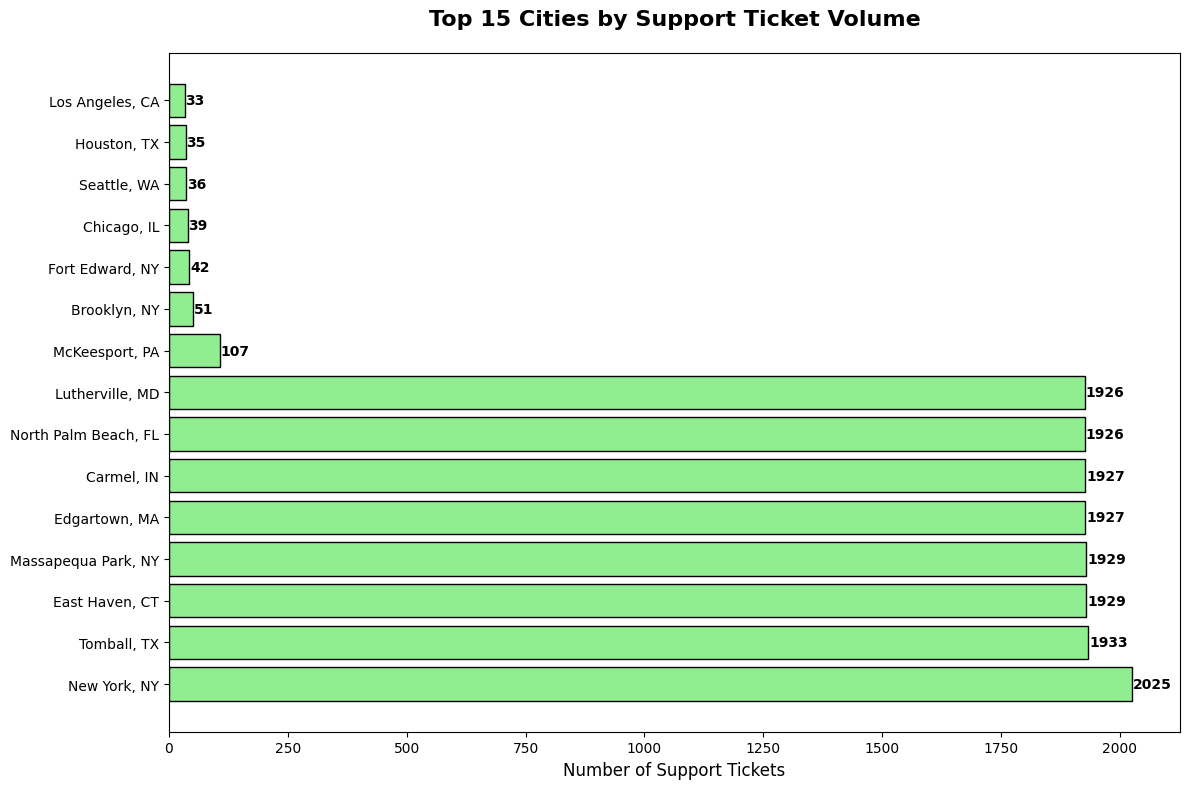


Geographic Distribution Analysis:
Total tickets with location data: 21,558

Top 10 States by Support Volume:
NY: 4,464 tickets (20.7%)
FL: 2,564 tickets (11.9%)
MA: 2,308 tickets (10.7%)
TX: 2,133 tickets (9.9%)
CT: 2,121 tickets (9.8%)
MD: 2,036 tickets (9.4%)
IN: 1,969 tickets (9.1%)
CA: 602 tickets (2.8%)
PA: 401 tickets (1.9%)
NJ: 359 tickets (1.7%)

Top 5 Countries by Support Volume:
US: 21,552 tickets (100.0%)
PR: 6 tickets (0.0%)

States with Highest Support Intensity (Tickets per Customer):
IN: 2.61 tickets per customer
MD: 0.96 tickets per customer
CT: 0.74 tickets per customer
TX: 0.65 tickets per customer
NY: 0.54 tickets per customer

Top 5 Cities by Support Volume:
New York, NY: 2,025 tickets
Tomball, TX: 1,933 tickets
East Haven, CT: 1,929 tickets
Massapequa Park, NY: 1,929 tickets
Edgartown, MA: 1,927 tickets


In [10]:
# Step 1: Get customer location data
# Use customers_data for clean location info
customer_locations = customers_data[['customer_id', 'clean_city', 'clean_state', 'shipping_country']].copy()

# Step 2: Link tickets to customer locations via orders data
customer_mapping = orders_data[['customer_id', 'email_hash']].drop_duplicates()
tickets_with_customer = tickets_data.merge(customer_mapping, left_on='requester_email', right_on='email_hash', how='left')

# Step 3: Add location data to tickets
tickets_with_location = tickets_with_customer.merge(customer_locations, on='customer_id', how='left')

# Step 4: Analyze support tickets by state
state_ticket_counts = tickets_with_location['clean_state'].value_counts().head(15)

# Step 5: Analyze support tickets by country
country_ticket_counts = tickets_with_location['shipping_country'].value_counts().head(10)

# Step 6: Create visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1: Top 15 States by Support Tickets
state_ticket_counts.plot(kind='barh', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Support Tickets by State (Top 15)', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Number of Support Tickets', fontsize=12)
ax1.set_ylabel('State', fontsize=12)

# Add value labels on state bars
for i, v in enumerate(state_ticket_counts.values):
    ax1.text(v + 5, i, str(v), ha='left', va='center', fontweight='bold')

# Plot 2: Support Tickets by Country
country_ticket_counts.plot(kind='bar', ax=ax2, color='lightcoral', edgecolor='black')
ax2.set_title('Support Tickets by Country', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Country', fontsize=12)
ax2.set_ylabel('Number of Support Tickets', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Add value labels on country bars
for i, v in enumerate(country_ticket_counts.values):
    ax2.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Step 7: Calculate support intensity (tickets per customer) by location
customer_counts_by_state = customer_locations['clean_state'].value_counts()
ticket_intensity_by_state = (state_ticket_counts / customer_counts_by_state).sort_values(ascending=False).head(10)

# Plot support intensity
plt.figure(figsize=(12, 6))
ticket_intensity_by_state.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Support Intensity by State (Tickets per Customer)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('State', fontsize=12)
plt.ylabel('Tickets per Customer', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for i, v in enumerate(ticket_intensity_by_state.values):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Step 8: Analyze cities with highest support volume
city_ticket_counts = tickets_with_location.groupby(['clean_city', 'clean_state']).size().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 8))
city_labels = [f"{city}, {state}" for city, state in city_ticket_counts.index]
plt.barh(range(len(city_ticket_counts)), city_ticket_counts.values, color='lightgreen', edgecolor='black')
plt.yticks(range(len(city_ticket_counts)), city_labels)
plt.xlabel('Number of Support Tickets', fontsize=12)
plt.title('Top 15 Cities by Support Ticket Volume', fontsize=16, fontweight='bold', pad=20)

# Add value labels
for i, v in enumerate(city_ticket_counts.values):
    plt.text(v + 2, i, str(v), ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print key insights
total_tickets_with_location = len(tickets_with_location.dropna(subset=['clean_state']))
print(f"\nGeographic Distribution Analysis:")
print(f"Total tickets with location data: {total_tickets_with_location:,}")

print(f"\nTop 10 States by Support Volume:")
for state, count in state_ticket_counts.head(10).items():
    percentage = (count / total_tickets_with_location) * 100
    print(f"{state}: {count:,} tickets ({percentage:.1f}%)")

print(f"\nTop 5 Countries by Support Volume:")
for country, count in country_ticket_counts.head(5).items():
    percentage = (count / total_tickets_with_location) * 100
    print(f"{country}: {count:,} tickets ({percentage:.1f}%)")

print(f"\nStates with Highest Support Intensity (Tickets per Customer):")
for state, intensity in ticket_intensity_by_state.head(5).items():
    print(f"{state}: {intensity:.2f} tickets per customer")

print(f"\nTop 5 Cities by Support Volume:")
for (city, state), count in city_ticket_counts.head(5).items():
    print(f"{city}, {state}: {count:,} tickets")